In [130]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

Extraigo el CSV que contiene los datos de "games"

In [138]:
df_games = pd.read_csv("post_ETL/df_games.csv")

Creo una lista de generos unicos

In [139]:
genre_strings = df_games["genres"]
genre_lists = [ast.literal_eval(genre) for genre in genre_strings]
all_genres = [genre for genres_list in genre_lists for genre in genres_list]
unique_genres = list(set(all_genres))

Creo columnas para cada genero en un dataframe,
asignando 1 si un juego pertenece a ese genero y 0 si no

In [140]:
for genre in unique_genres:
    df_games[genre] = df_games["genres"].apply(lambda x: 1 if genre in ast.literal_eval(x) else 0)

Elimino columnas innecesarias

In [141]:
columnas = ["genres", "app_name", "developer", "id", "price", "early_access", "release_date"]
df_games = df_games.drop(columns=columnas)

Guardo el dataframe en un CSV llamado "df_games_ml"

In [137]:
df_games.to_csv("post_ETL/df_games_ml.csv", index=False)

Visualizo la correlacion entre generos

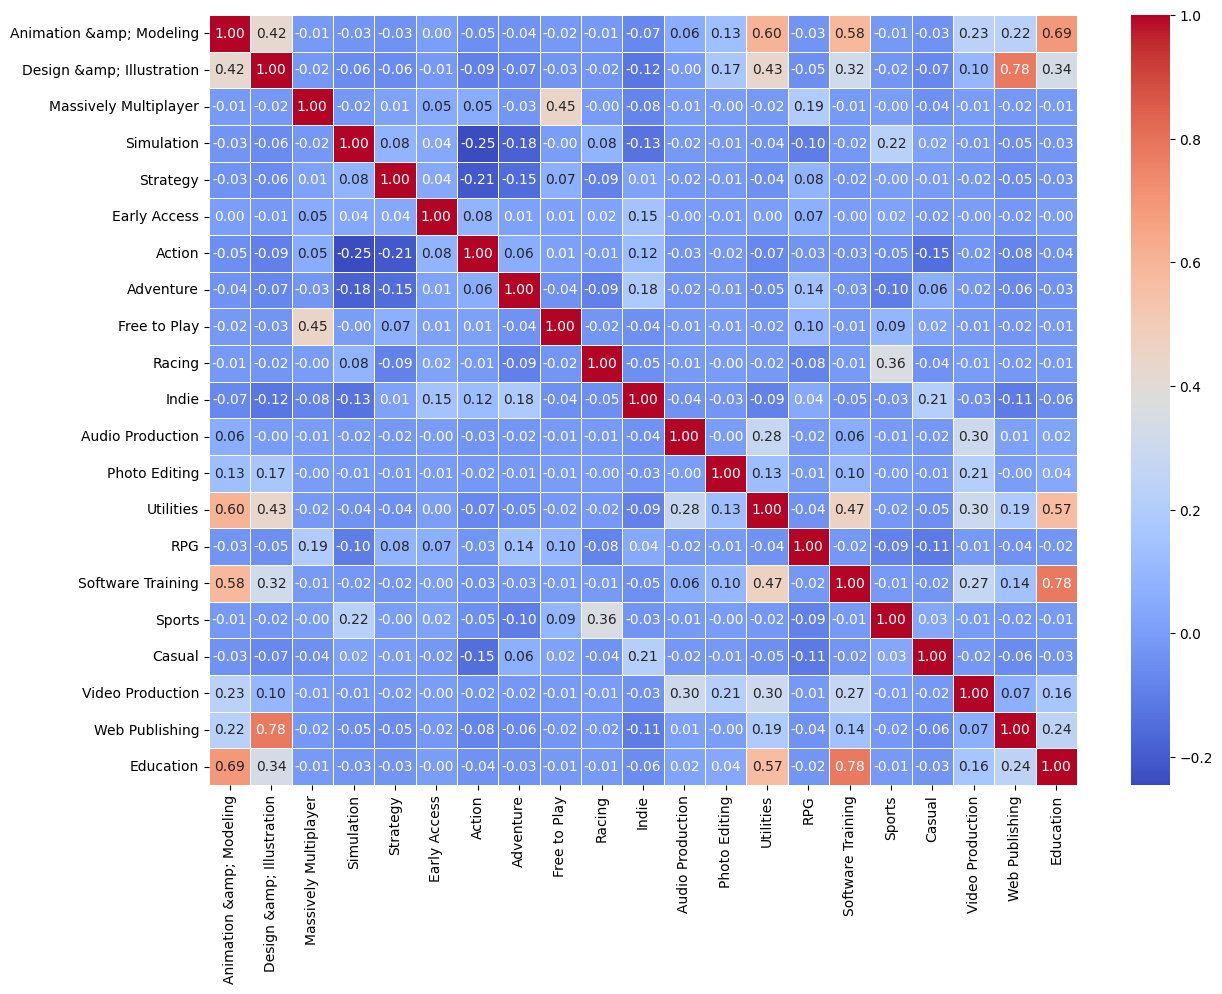

In [142]:
correlation_matrix = df_games.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()